<a href="https://colab.research.google.com/github/CatherineHabib/Selected4-Project/blob/main/DETRCarDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car-Detection-With-DETR

### Import Dataset from kaggle to Google Drive

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"catherinehabib","key":"c823e76a1df25026aa8ac4bdd36817a9"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sshikamaru/car-object-detection

 97% 109M/112M [00:05<00:00, 24.7MB/s]
100% 112M/112M [00:06<00:00, 19.6MB/s]


In [ ]:
!unzip /content/car-object-detection.zip

Archive:  /content/car-object-detection.zip
  inflating: data/sample_submission.csv  
  inflating: data/testing_images/vid_5_25100.jpg  
  inflating: data/testing_images/vid_5_25120.jpg  
  inflating: data/testing_images/vid_5_25140.jpg  
  inflating: data/testing_images/vid_5_25160.jpg  
  inflating: data/testing_images/vid_5_25180.jpg  
  inflating: data/testing_images/vid_5_25200.jpg  
  inflating: data/testing_images/vid_5_25220.jpg  
  inflating: data/testing_images/vid_5_25240.jpg  
  inflating: data/testing_images/vid_5_25260.jpg  
  inflating: data/testing_images/vid_5_26320.jpg  
  inflating: data/testing_images/vid_5_26400.jpg  
  inflating: data/testing_images/vid_5_26420.jpg  
  inflating: data/testing_images/vid_5_26560.jpg  
  inflating: data/testing_images/vid_5_26580.jpg  
  inflating: data/testing_images/vid_5_26600.jpg  
  inflating: data/testing_images/vid_5_26620.jpg  
  inflating: data/testing_images/vid_5_26640.jpg  
  inflating: data/testing_images/vid_5_26660.jp

In [ ]:
%cd /content/drive/MyDrive/
!mkdir Selected-4
%cd Selected-4/
!mkdir CarDataset
!mv /content/car-object-detection.zip ./CarDataset
!mv /content/data ./CarDataset

/content/drive/MyDrive
/content/drive/MyDrive/Selected-4


###Install Dependencies

In [ ]:
!pip install torch_snippets torchsummary pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB

###Import Libraries

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import glob 
import random 

import torch
from torchvision import transforms as T
from torch_snippets import *

###Process Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Selected-4/CarDataset/data/train_solution_bounding_boxes (1).csv')
data[['xmin', 'ymin', 'xmax', 'ymax']] = data[['xmin', 'ymin', 'xmax', 'ymax']].astype(int)
data.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281,187,327,223
1,vid_4_10000.jpg,15,187,120,236
2,vid_4_10040.jpg,239,176,361,236
3,vid_4_10020.jpg,496,172,630,231
4,vid_4_10060.jpg,16,186,132,238


Image Shape:
(380, 676, 3)

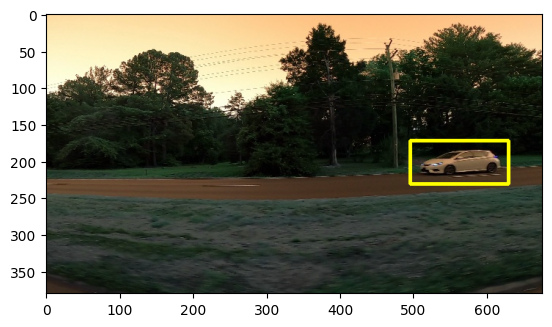

In [ ]:
DIR = '/content/drive/MyDrive/Selected-4/CarDataset/data/training_images/'
row = dict(data.iloc[3])
img = cv2.imread(DIR + row['image'])
print('Image Shape:', img.shape)
xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 255, 0), 3)
plt.imshow(img)

###Convert CSV/annotations file to COCO

In [ ]:
def image(row):
    image = {}
    img = cv2.imread(DIR + row.image)
    image["height"] = img.shape[0]
    image["width"] = img.shape[1]
    image["id"] = row.fileid
    image["file_name"] = row.image
    return image

def annotation(row):
    annotation = {}
    area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
    annotation["segmentation"] = []
    annotation["iscrowd"] = 0
    annotation["area"] = area
    annotation["image_id"] = row.fileid
    annotation["bbox"] = [row.xmin, row.ymin, row.xmax-row.xmin, row.ymax-row.ymin]
    annotation["category_id"] = row.categoryid
    annotation["id"] = row.annid
    return annotation

In [ ]:
train_json_path = 'train_coco.json'
val_json_path = 'val_coco.json'

categories = []
train_images = []
train_annotations = []
val_images = []
val_annotations = []

In [ ]:
# dataset only has a single category, car
category = {}
category["supercategory"] = 'none'
category["id"] = 1
category["name"] = 'car'
categories.append(category)

In [ ]:
data['fileid'] = data['image'].astype('category').cat.codes
data['categoryid']= 1
data['annid'] = data.index
data.head()

,image,xmin,ymin,xmax,ymax,fileid,categoryid,annid
0,vid_4_1000.jpg,281,187,327,223,0,1,0
1,vid_4_10000.jpg,15,187,120,236,1,1,1
2,vid_4_10040.jpg,239,176,361,236,3,1,2
3,vid_4_10020.jpg,496,172,630,231,2,1,3
4,vid_4_10060.jpg,16,186,132,238,4,1,4


In [ ]:
train_val_imgs = glob.glob('/content/drive/MyDrive/Selected-4/CarDataset/data/training_images/*')
train_val_imgs = list(map(fname, train_val_imgs))
random.shuffle(train_val_imgs)
val_imgs = train_val_imgs[:50]
train_imgs = train_val_imgs[50:]
print('Training Size:', len(train_imgs))
print('Validation Size:', len(val_imgs))

Training Size: 951

Validation Size: 50

In [ ]:
for row in data.itertuples():
    if row.image in val_imgs:
        val_annotations.append(annotation(row))
    else:
        train_annotations.append(annotation(row))

imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
for row in imagedf.itertuples():
    if row.image in val_imgs:
        val_images.append(image(row))
    else:
        train_images.append(image(row))

train_data_coco = {}
train_data_coco["images"] = train_images
train_data_coco["categories"] = categories
train_data_coco["annotations"] = train_annotations
json.dump(train_data_coco, open(train_json_path, "w"), indent=4)

val_data_coco = {}
val_data_coco["images"] = val_images
val_data_coco["categories"] = categories
val_data_coco["annotations"] = val_annotations
json.dump(val_data_coco, open(val_json_path, "w"), indent=4)

###Detection Transformer- DETR

In [ ]:
%cd /content/drive/MyDrive/Selected-4/
!mkdir Facebook-DETR
if not os.path.exists(os.path.join("/content/drive/MyDrive/Selected-4/Facebook-DETR" ,'detr')):
    %cd /content/drive/MyDrive/Selected-4/Facebook-DETR
    !git clone https://github.com/sizhky/detr/

/content/drive/MyDrive/Selected-4
/content/drive/MyDrive/Selected-4/Facebook-DETR
Cloning into 'detr'...
remote: Enumerating objects: 283, done.
remote: Total 283 (delta 0), reused 0 (delta 0), pack-reused 283
Receiving objects: 100% (283/283), 12.88 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [ ]:
# moving files to desired folder structure
%cd /content/drive/MyDrive/Selected-4/Facebook-DETR/detr
!mkdir annotations
!mv /content/train_coco.json ./annotations/instances_train2017.json
!mv /content/val_coco.json ./annotations/instances_val2017.json
!ln -s /content/drive/MyDrive/Selected-4/CarDataset/data/training_images/ train2017
!ln -s /content/drive/MyDrive/Selected-4/CarDataset/data/training_images/ val2017

/content/drive/MyDrive/Selected-4/Facebook-DETR/detr


In [ ]:
# To load pre-trained weights
if not os.path.exists('detr-r50-e632da11.pth'):
    !wget https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth 
    checkpoint = torch.load("detr-r50-e632da11.pth", map_location='cpu')
    del checkpoint["model"]["class_embed.weight"]
    del checkpoint["model"]["class_embed.bias"]
    torch.save(checkpoint,"detr-r50_no-class-head.pth")

--2023-05-01 02:16:13--  https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.8.35, 13.35.8.29, 13.35.8.19, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.8.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166618694 (159M) [application/octet-stream]
Saving to: ‘detr-r50-e632da11.pth’

detr-r50-e632da11.p 100%[===================>] 158.90M  53.1MB/s    in 3.0s    

2023-05-01 02:16:16 (53.1 MB/s) - ‘detr-r50-e632da11.pth’ saved [166618694/166618694]



In [ ]:
!python main.py --coco_path . --nclasses=1\
  --epochs 20 --lr=1e-4 --batch_size=6 --num_workers=1\
  --output_dir="outputs" --resume="detr-r50_no-class-head.pth"

Not using distributed mode
git:
  sha: 80281780ef5f1316378a5d760e78db20a72101c1, status: clean, branch: master

Namespace(lr=0.0001, lr_backbone=1e-05, batch_size=6, weight_decay=0.0001, epochs=20, lr_drop=200, clip_max_norm=0.1, nclasses=1, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=6, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=100, pre_norm=False, masks=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, dataset_file='coco', coco_path='.', coco_panoptic_path=None, remove_difficult=False, output_dir='outputs', device='cuda', seed=42, resume='detr-r50_no-class-head.pth', start_epoch=0, eval=False, num_workers=1, world_size=1, dist_url='env://', distributed=False)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprec

###Testing Data

In [ ]:
# Load model from torch.hub and load the checkpoints file into the model
import torch
TRAINED_CKPT_PATH = '/content/drive/MyDrive/Selected-4/Facebook-DETR/detr/outputs/checkpoint.pth'
checkpoint = torch.load(TRAINED_CKPT_PATH, map_location='cpu')
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=False, num_classes=2)
model.load_state_dict(checkpoint['model'], strict=False)

Downloading: "https://github.com/facebookresearch/detr/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [ ]:
import sys    
path_to_module = '/content/drive/MyDrive/Selected-4/Facebook-DETR/detr/util'
sys.path.append(path_to_module)

/content/drive/MyDrive/Selected-4/Facebook-DETR/detr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(


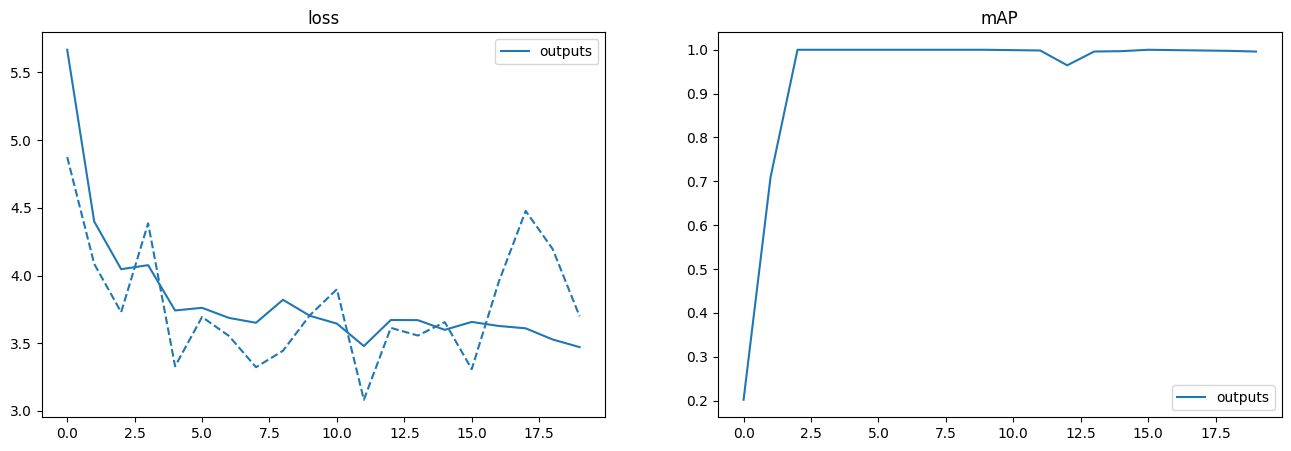

In [ ]:
from plot_utils import plot_logs
from pathlib import Path

log_directory = [Path('/content/drive/MyDrive/Selected-4/Facebook-DETR/detr/outputs')]

fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory, fields_of_interest)

/content/drive/MyDrive/Selected-4/Facebook-DETR/detr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/content/drive/MyDrive/Selected-4/Facebook-DETR/detr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/content/drive/MyDrive/Selected-4/Facebook-DETR/detr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling t

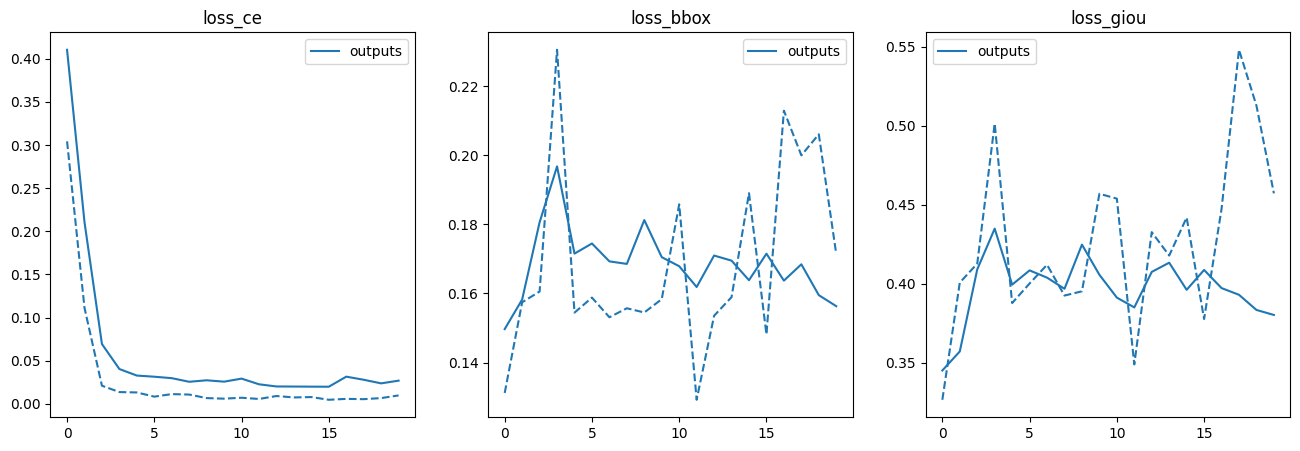

In [ ]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )

plot_logs(log_directory,
          fields_of_interest)

/content/drive/MyDrive/Selected-4/Facebook-DETR/detr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/content/drive/MyDrive/Selected-4/Facebook-DETR/detr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(


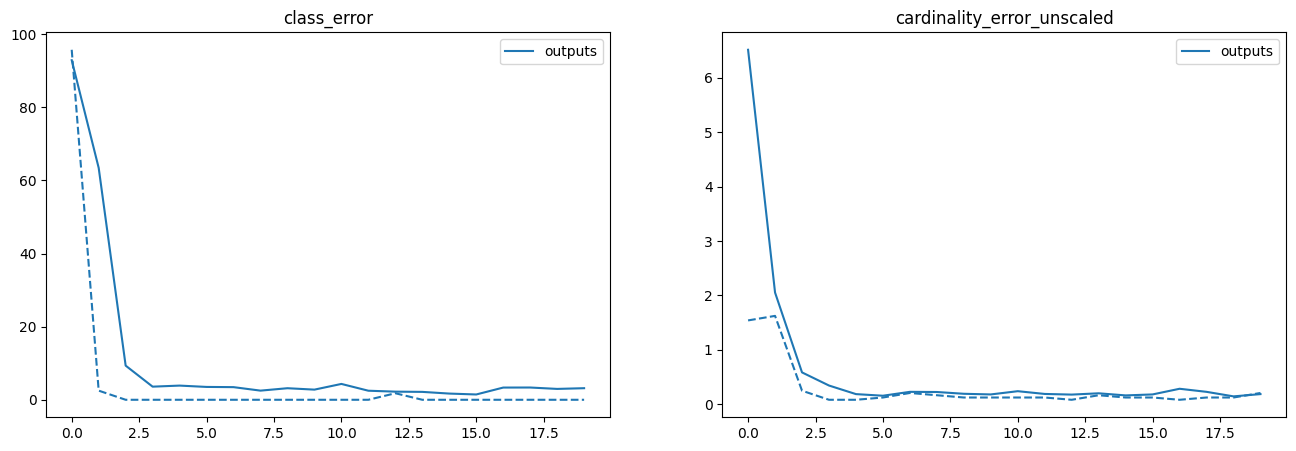

In [ ]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)

In [ ]:
COLORS = [[0.000, 0.447, 0.741]]

transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
def process_bbox(bbox):
    x_c, y_c, w, h = bbox.unbind(1)
    new_bbox = [(x_c - 0.5 * w), (y_c - 0.5 * h),
                (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(new_bbox, dim=1)

def rescale_bboxes(bbox, size):
    img_w, img_h = size
    new_bbox = process_bbox(bbox)
    new_bbox *= torch.tensor([img_w, img_h, img_w, img_h],
                              dtype=torch.float32)
    return new_bbox
    
def detect(im, model, transform, thres=0.7):
    img = transform(im).unsqueeze(0)
    outputs = model(img)
    probs = outputs['pred_logits'].softmax(-1)[0, :, :-1]
    keep = probs.max(-1).values > thres
    # convert boxes from [0, 1] to image scales
    bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0, keep], im.size)
    return probs[keep], bboxes_scaled

def plot_results(path_img, prob, boxes, figsize=(16, 10)):
    plt.figure(figsize=figsize)
    img = cv2.imread(path_img)
    img = cv2.resize(img, (800, 800))
    font = cv2.FONT_HERSHEY_PLAIN
    for prob, (xmin, ymin, xmax, ymax), col in \
        zip(prob, boxes.tolist(), COLORS * 100):
        xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 255, 0), 3)
        cl = prob.argmax()
        text = f'car: {prob[cl]:0.2f}'
        cv2.putText(img, text, (xmin, ymin-20), font, 2, 
                    (255, 255, 255), 2)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

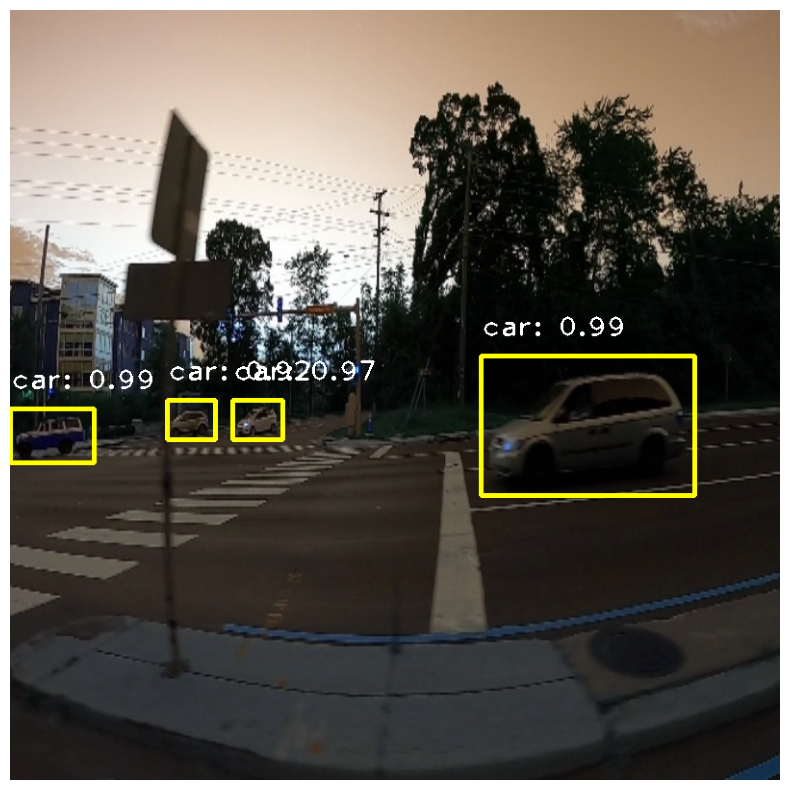

Duration (seconds): 7.66626

In [ ]:
import time
from PIL import Image
start_time = time.time()
img_path = '/content/drive/MyDrive/Selected-4/CarDataset/data/testing_images/vid_5_27480.jpg'
img = Image.open(img_path)
img = img.resize((800,800)).convert('RGB')
scores, boxes = detect(img, model, transform)
plot_results(img_path, scores, boxes)
print(f'Duration (seconds): {time.time() - start_time:.5f}')

### Thank You..!
